# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
# from google.colab import drive
# drive.mount("Drive")

#### Let's import th data 

In [3]:
# path = '/content/Drive/MyDrive/AlmaBetter/Modules/Module 4 : Machine Learning/4.7 - Logistic Regression/Assignment/Copy of WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
pd.set_option("max_rows" , None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Let's check the no of Missing value present in each column

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Logistic Regression is robust to outliers that's why we are not removing outliers

In [6]:
df.shape[0]

7043

In [7]:
len(df.customerID.unique())

7043

###### As you can see customerID has unique ID it's is not important that's why I'm removing this column

In [8]:
df.drop(columns=['customerID'] , inplace = True)

In [9]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


#### In this dataset we have both numerical & categorical columns , let's make two different DataFrame 

In [10]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print(f'No of Numerical feature present in numeric_data is {numeric_data.shape[1]}')
print(f'No of Categorical feature present in categorical_data is {categorical_data.shape[1]}')

No of Numerical feature present in numeric_data is 3
No of Categorical feature present in categorical_data is 17


In [11]:
print("All the numrical columns are",end=' ')
print(numeric_data.columns)

All the numrical columns are Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [12]:
print("All the categorical columns are",end=' ')
print(categorical_data.columns)

All the categorical columns are Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')


#### The TotalCharges column is treated as a categorical column here , but actually it's numeric column let's convert

In [13]:
print(f"The datatype of Totalcharges is {df.TotalCharges.dtype}")
print(f"Datatype of df.TotalCharges[0] is {type(df.TotalCharges[0])} ")

The datatype of Totalcharges is object
Datatype of df.TotalCharges[0] is <class 'str'> 


In [14]:
TotalCharge = []
for index , Tot_charge in enumerate(df.TotalCharges):
#     print(Tot_charge)
    if len(Tot_charge)==0 or Tot_charge==' ':
        df.drop(axis = 0 , index = index , inplace = True)
    else:
        TotalCharge.append(float(Tot_charge))

In [15]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### After droping the NULL values now the dataframe size is

In [16]:
df.TotalCharges = TotalCharge

In [17]:
df.shape

(7032, 20)

##### Now we have to reassign the numeric & categorical columns

In [18]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print(f'No of Numerical features present in numeric_data is {numeric_data.shape[1]}')
print(f'No of Categorical features present in categorical_data is {categorical_data.shape[1]}')

No of Numerical features present in numeric_data is 4
No of Categorical features present in categorical_data is 16


In [19]:
print("All the categorical columns are",end=' ')
print(categorical_data.columns)

print("All the numrical columns are",end=' ')
print(numeric_data.columns)

All the categorical columns are Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
All the numrical columns are Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


##### Now will perform encoding to categorical data

In [20]:
categorical_data.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [21]:
print(f"The shape of categorical_data is {categorical_data.shape}")

The shape of categorical_data is (7032, 16)


In [22]:
categorical_data.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


In [23]:
for col_name in categorical_data:
    print('*'*15 , col_name , '*'*15)
    print(df[col_name].value_counts().to_frame())
    print('*'*35 , end='\n')

*************** gender ***************
        gender
Male      3549
Female    3483
***********************************
*************** Partner ***************
     Partner
No      3639
Yes     3393
***********************************
*************** Dependents ***************
     Dependents
No         4933
Yes        2099
***********************************
*************** PhoneService ***************
     PhoneService
Yes          6352
No            680
***********************************
*************** MultipleLines ***************
                  MultipleLines
No                         3385
Yes                        2967
No phone service            680
***********************************
*************** InternetService ***************
             InternetService
Fiber optic             3096
DSL                     2416
No                      1520
***********************************
*************** OnlineSecurity ***************
                     OnlineSecurity
No        

In [24]:

# Creating dummy variables:(Without using drop_first)
df_categorical = pd.get_dummies( categorical_data , columns = categorical_data.columns )
print(f"Shape of df_categorical is {df_categorical.shape}")


Shape of df_categorical is (7032, 43)


In [25]:
df_categorical.head(3)

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [26]:

# Creating dummy variables(Using drop_first)
df_categorical = pd.get_dummies( categorical_data , columns = categorical_data.columns ,  drop_first = True)
print(f"Shape of df_categorical is {df_categorical.shape}")


Shape of df_categorical is (7032, 27)


In [27]:
print(f'If we are using drop_first then {43-27} feature gone ')

If we are using drop_first then 16 feature gone 


In [28]:
categorical_data = df_categorical

### Let's create df where we have all numeric values & encoded categorical vales as well

In [29]:
print(f"Shape of numerical_data is {numeric_data.shape}")
print(f"Shape of categorical_data is {categorical_data.shape}")

Shape of numerical_data is (7032, 4)
Shape of categorical_data is (7032, 27)


In [30]:
df = pd.merge(numeric_data , categorical_data , left_index = True , right_index = True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


#### Let's check correlation

<AxesSubplot:>

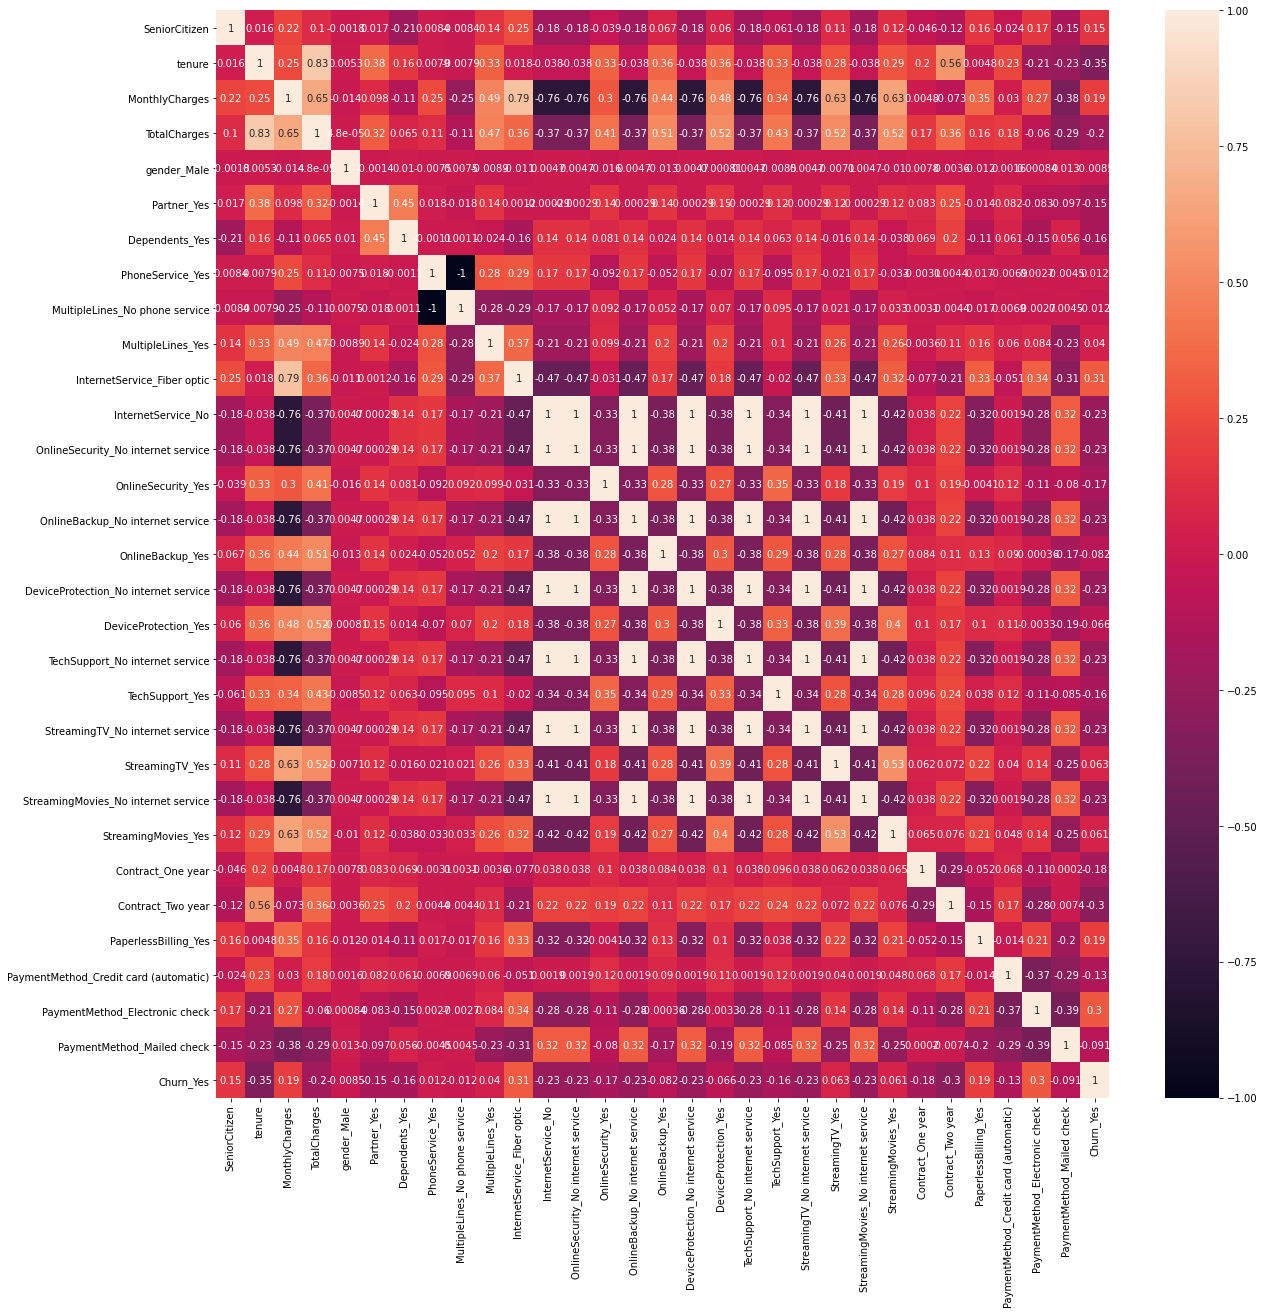

In [31]:
corr = df.corr()
plt.figure(figsize = (20 ,20))
sns.heatmap(corr , annot = True)


In [32]:
categorical_data.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


As you can see 
* **InternetService_No** is **highly correlated** with these columns *(Positively correlated)*
    * **StreamingMovies_No internet service**
    * **StreamingTV_No internet service**
    * **TechSupport_No internet service**
    * **DeviceProtection_No internet service** 
    * **OnlineSecurity_No internet service**
    * **OnlineBackup_No internet service**


<AxesSubplot:>

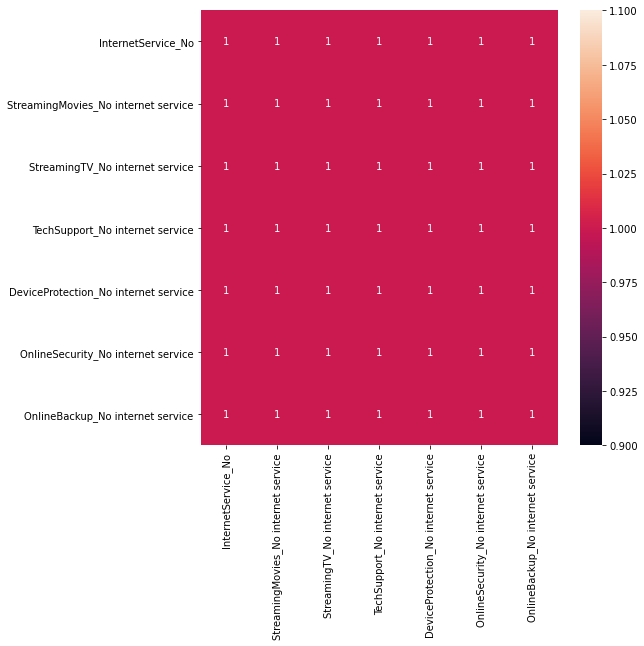

In [33]:
df_InternetService_ = df[['InternetService_No' , 'StreamingMovies_No internet service',
               'StreamingTV_No internet service','TechSupport_No internet service' ,'DeviceProtection_No internet service'
                          ,'OnlineSecurity_No internet service' , 'OnlineBackup_No internet service']]
df_InternetService_Corr = df_InternetService_.corr()
plt.figure(figsize = (8 , 8))
sns.heatmap(df_InternetService_Corr , annot = True)


#### Let's remove all the columns except InternetService_No which present in df_InternetService_Corr from df

In [34]:
unwanted_col = set(df_InternetService_Corr.columns) - {'InternetService_No'}
unwanted_col

{'DeviceProtection_No internet service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service'}

#### Let's remove

In [35]:
print(f"Before removing the unwanted_columns the no of features present in df was {df.shape[-1]}  ")
df.drop(columns = unwanted_col , inplace = True)
print(f"After removing the unwanted_columns the no of features present in df was {df.shape[-1]}  ")

Before removing the unwanted_columns the no of features present in df was 31  
After removing the unwanted_columns the no of features present in df was 25  


#### Let's again see the correlated plot & remove unwanted columns

<AxesSubplot:>

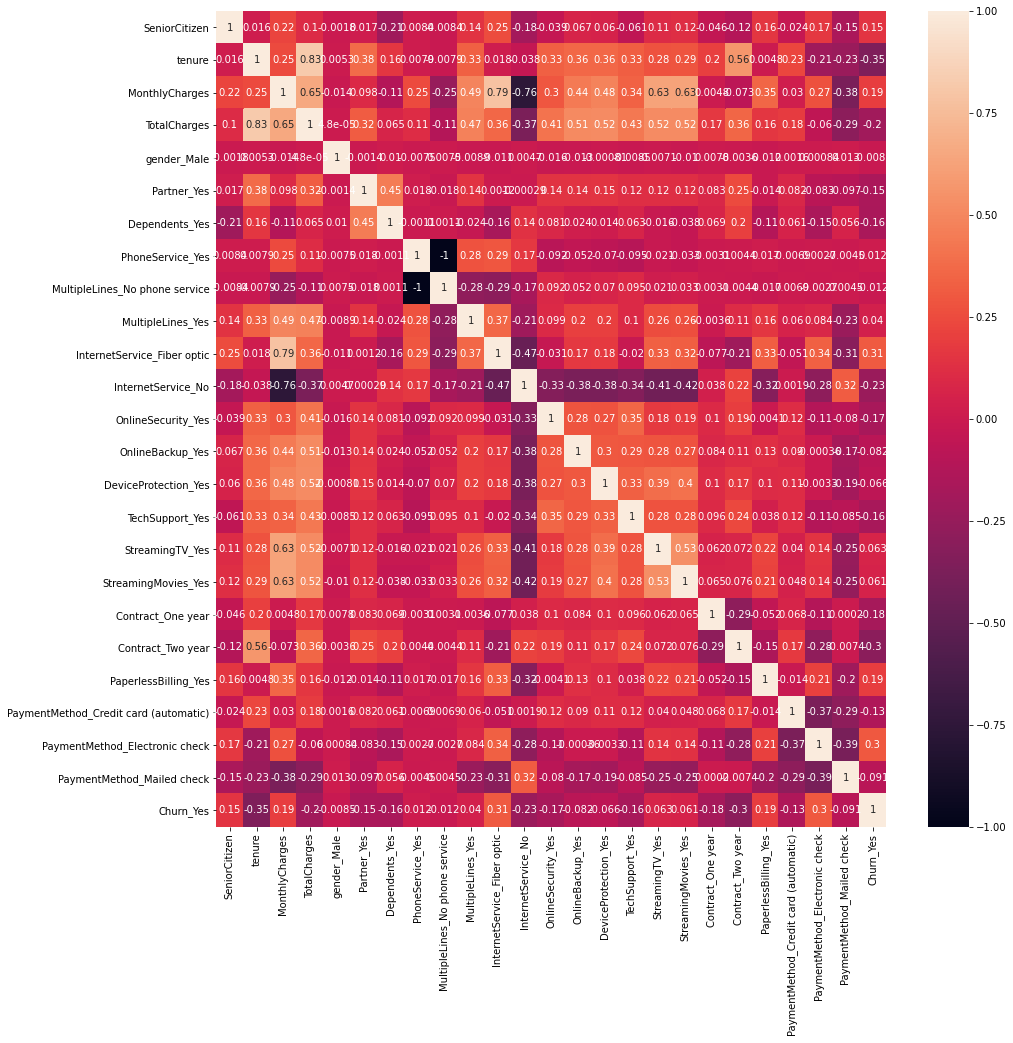

In [36]:
corr = df.corr()
plt.figure(figsize = (15 ,15))
sns.heatmap(corr , annot = True)


In [37]:
corr['MonthlyCharges']

SeniorCitizen                            0.219874
tenure                                   0.246862
MonthlyCharges                           1.000000
TotalCharges                             0.651065
gender_Male                             -0.013779
Partner_Yes                              0.097825
Dependents_Yes                          -0.112343
PhoneService_Yes                         0.248033
MultipleLines_No phone service          -0.248033
MultipleLines_Yes                        0.490912
InternetService_Fiber optic              0.787195
InternetService_No                      -0.763191
OnlineSecurity_Yes                       0.296447
OnlineBackup_Yes                         0.441529
DeviceProtection_Yes                     0.482607
TechSupport_Yes                          0.338301
StreamingTV_Yes                          0.629668
StreamingMovies_Yes                      0.627235
Contract_One year                        0.004810
Contract_Two year                       -0.073256


* As we can see **TotalCharges & tenure** is highly pos. correlated (0.825)
* As we can see **TotalCharges & InternetService_No** is highly neg. correlated (-0.763)
#### Let's remove InternetService_No & tenure


In [38]:
df.drop(axis = 1,columns = ['tenure' , 'InternetService_No' ] , inplace = True)

In [39]:
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,-0.001819,0.016957,-0.210550,0.008392,-0.008392,0.142996,...,-0.060577,0.105445,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.005285,0.381912,0.163386,0.007877,-0.007877,0.332399,...,0.325288,0.280264,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,-0.013779,0.097825,-0.112343,0.248033,-0.248033,0.490912,...,0.338301,0.629668,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,-0.113008,0.469042,...,0.432868,0.515709,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484
gender_Male,-0.001819,0.005285,-0.013779,0.000048,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,...,-0.008507,-0.007124,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199,-0.008545
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,...,0.120206,0.124483,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948,-0.149982
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,...,0.063053,-0.016499,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,...,-0.095138,-0.021383,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,...,0.095138,0.021383,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463,-0.011691
MultipleLines_Yes,0.142996,0.332399,0.490912,0.469042,-0.008883,0.142561,-0.024307,0.279530,-0.279530,1.000000,...,0.100421,0.257804,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033


In [40]:
corr = df.corr()
pd.set_option("max_columns" , None)
corr[['MonthlyCharges']].T

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
MonthlyCharges,0.219874,1.0,0.651065,-0.013779,0.097825,-0.112343,0.248033,-0.248033,0.490912,0.787195,0.296447,0.441529,0.482607,0.338301,0.629668,0.627235,0.00481,-0.073256,0.35193,0.030055,0.271117,-0.376568,0.192858


* As we can see **MonthlyCharges & InternetService_Fiber optic** is highly pos. correlated (0.787)

In [41]:
df.drop(axis=1,columns = ['InternetService_Fiber optic'] , inplace = True)

In [42]:
df.shape

(7032, 22)

<AxesSubplot:>

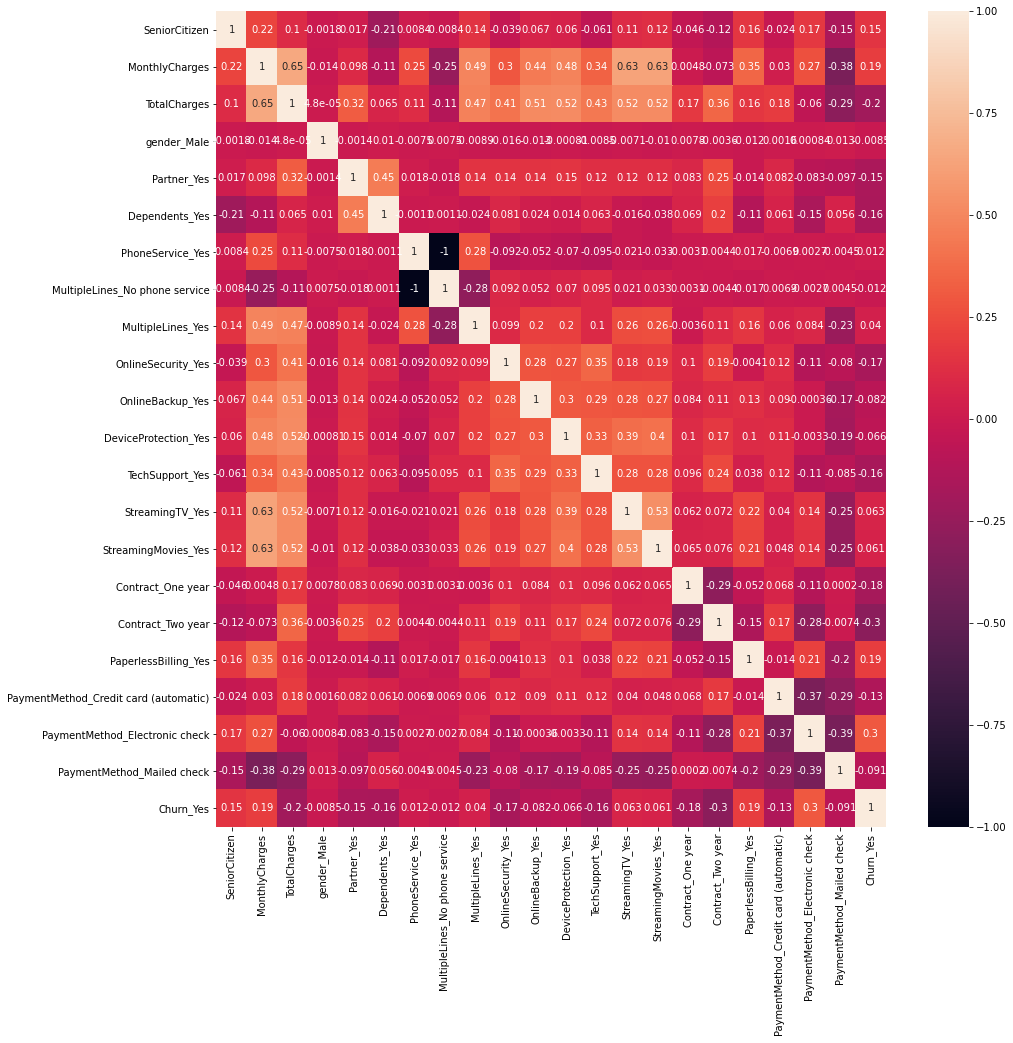

In [43]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr.T , annot = True)

#### Let's scale down data

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()
df_new = scaler.fit_transform(df)
df_new[0 , ]

array([0.        , 0.11542289, 0.0012751 , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        ])

In [46]:
df = pd.DataFrame(df_new , columns = df.columns )

In [47]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### Let's make Dependent DataFrame & Independent DataFrame(Y)

In [48]:
df.head(1)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [49]:
y = df.Churn_Yes
x = df.drop(columns = ['Churn_Yes'])

In [50]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn_Yes, dtype: float64

In [51]:
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


##### Let's split the dataset into 80:20 ratio

In [52]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y,train_size=0.8 , random_state =19) 

In [53]:
l=[x_train , x_test , y_train , y_test]
for i in l:
    print("Shape is ",i.shape)

Shape is  (5625, 21)
Shape is  (1407, 21)
Shape is  (5625,)
Shape is  (1407,)


### Importing Logit. Reg.

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression(fit_intercept=True, max_iter=10000)

In [56]:
model.fit(x_train , y_train)

LogisticRegression(max_iter=10000)

In [57]:
y_pred = model.predict(x_test)
y_pred[0:5]

array([0., 0., 0., 0., 0.])

In [58]:
result = pd.DataFrame({"Y_actual" :y_test , "Y_predicted" : y_pred})
result.head()

,Y_actual,Y_predicted
3855,0.0,0.0
6335,1.0,0.0
2921,0.0,0.0
6047,0.0,0.0
3793,1.0,0.0


In [59]:
#Coefficient values of this model
model.coef_

array([[ 0.1682979 ,  3.63970719, -2.4304367 ,  0.01657234, -0.07788019,
        -0.14978329, -0.47964912,  0.48204445,  0.07208336, -0.59726209,
        -0.34741695, -0.21503377, -0.40320651,  0.0186741 , -0.01339717,
        -0.84580639, -1.67822733,  0.2902216 , -0.15091231,  0.35413908,
         0.11805253]])

In [60]:
#Intercept value
model.intercept_

array([-1.41013976])

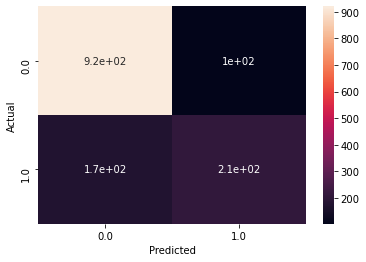

In [61]:
confusion_matrix = pd.crosstab( result['Y_actual'], result['Y_predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

#### Get the predicted probabilities

In [62]:
# Get the predicted probabilities
train_preds = model.predict_proba(x_train)
test_preds = model.predict_proba(x_test)

In [63]:
test_preds[:5,:]

array([[0.97863787, 0.02136213],
       [0.5456761 , 0.4543239 ],
       [0.96219017, 0.03780983],
       [0.96686834, 0.03313166],
       [0.88452641, 0.11547359]])

In [64]:
result.head()

,Y_actual,Y_predicted
3855,0.0,0.0
6335,1.0,0.0
2921,0.0,0.0
6047,0.0,0.0
3793,1.0,0.0


In [65]:
train_class_preds = model.predict(x_train)
test_class_preds = model.predict(x_test)

### Checking Accuracy score

In [66]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", round(train_accuracy,4))
print("The accuracy on test data is ", round(test_accuracy , 4))

The accuracy on train data is  0.7991
The accuracy on test data is  0.8038


## <b><u>Implementing Cross-validated Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [68]:
logit_cv = LogisticRegression()

In [69]:
scoring = ['accuracy']
scores = cross_validate(logit_cv , x_train , y_train , scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.797, test=0.803) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.801, test=0.779) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.806, test=0.778) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.797, test=0.807) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.797, test=0.809) total time=   0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [70]:
scores['train_accuracy']

array([0.79733333, 0.80111111, 0.80577778, 0.79666667, 0.79711111])

In [71]:
scores['test_accuracy']

array([0.80266667, 0.77866667, 0.77777778, 0.80711111, 0.80888889])

In [72]:
Accuracy_cv = pd.DataFrame({"train_accuracy":scores['train_accuracy'] , "test_accuracy":scores['test_accuracy']})

In [73]:
Accuracy_cv

,train_accuracy,test_accuracy
0,0.797333,0.802667
1,0.801111,0.778667
2,0.805778,0.777778
3,0.796667,0.807111
4,0.797111,0.808889


In [74]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]